In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from frac_cloud import frac_physics,readSHDOMRad,setProp

# Generating a fractal cloud 
    

File already exist. Replace?:  n


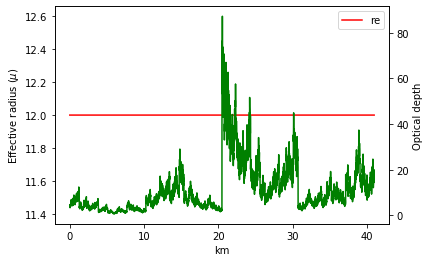

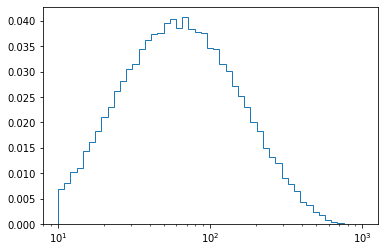

In [13]:
re = 12 # um
lwp = 90 # g/m^2
fc = frac_physics('fractal1_example',dpath=None)
fc.generate_fractal(re,lwp)
fc.plot_cld()
fc.plot_lwp_pdf()
fc.save_frach5('fractal1_example')

# Reading previously-generated fractal cloud (Case 1)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aaadbd32e80>)

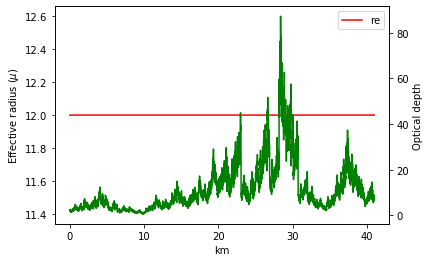

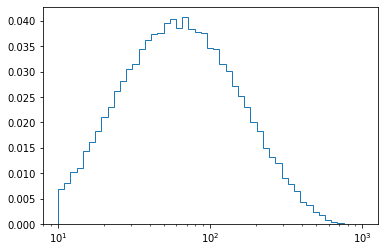

In [4]:
fc = frac_physics('fractal1_example',dpath=None)
fc.read_frach5('fractal1_example.hdf5')
fc.plot_cld()
fc.plot_lwp_pdf()

# Reading previously-generated fractal cloud (Case 2 Spot3D_paper)
https://www.sciencedirect.com/science/article/pii/S0022407319306569

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2aaadc9b0198>)

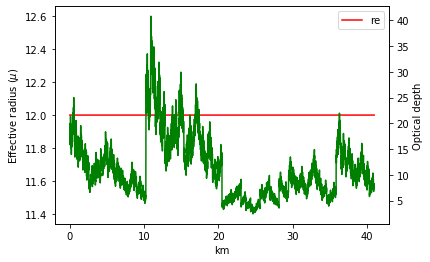

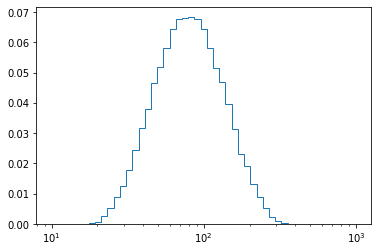

In [17]:
fc = frac_physics('spot3D_fractal.hdf5',dpath=None)
fc.read_frach5()
fc.plot_cld()
fc.plot_lwp_pdf()

# SHDOM

In [18]:
#INPUTS
wvl = '0.865' #um Wavelength
cer = '12' #um Cloud Effective Radius
CEV = 0.05
alpha = "%0.1f"%(1.0/CEV-3)
sfname = 'spot3D'+wvl+'CER'+cer
SZA = 60 # degrees
SAA = 0 # degrees
VZA = 0
#-------------------------------------------------------
#Creating Mie Scattering Table
cr = [] #checking system commands
sfname = sfname.replace('.','p')
cm1 = "sed \'s/<WLN>/"+wvl+"/g\' run_mie > tmp1"
cm2 = "sed \'s/<CER>/"+cer+"/g\' tmp1 > tmp2"
cm3 = "sed \'s/<NAME>/"+sfname+".scat/g\' tmp2 > tmp3"
cm4 = "sed \'s/<ALPHA>/"+alpha+"/g\' tmp3 > tmp4"
cr =[os.system(st) for st in [cm1,cm2,cm3,cm4]]
cr= np.append(cr,os.system('chmod +x tmp4'))
cr= np.append(cr,os.system('./tmp4'))
cr= np.append(cr,os.system('mv tmp4 run_mie_latest'))
cr= np.append(cr,os.system('rm tmp*'))
scat_file = sfname.replace('.','p')+'.scat'
print('Mie Scattering table ...')
print(cr)

#-------------------------------------------------------
#Generating *.prp file for SHDOM and running SHDOM
if sum(cr)==0:
    setProp(scat_file, wvl,fc)
    #Running SHDOM
    mu_SZA = np.cos(np.deg2rad(SZA))
    mu_VZA = np.cos(np.deg2rad(VZA))
    cm1 = "sed \'s/<PRPN>/"+sfname+".prp/g\' run_shdom > tmp1"
    cm2 = "sed \'s/<BASN>/"+sfname+"/g\' tmp1 > tmp2"
    cm3 = "sed \'s/<WVL>/"+wvl+"/g\' tmp2 > tmp3"
    cm4 = "sed \'s/<MSZA>/%0.2f"%mu_SZA+"/g\' tmp3 > tmp4"
    cm5 = "sed \'s/<DSAA>/%0.1f"%(SAA)+"/g\' tmp4 > tmp5"
    cm6 = "sed \'s/<MVZA>/%0.1f"%(mu_VZA)+"/g\' tmp5 > tmp6"
    cr =[os.system(st) for st in [cm1,cm2,cm3,cm4,cm5,cm6]]
    cr =np.append(cr,os.system('chmod +x tmp6'))
    cr =np.append(cr,os.system('./tmp6'))
    cr =np.append(cr,os.system('mv tmp6 run_shdom_latest'))
    cr =np.append(cr,os.system('rm tmp*'))
    print('SHDOM run ...')
    print(cr)

else:
    print('Something went wrong in Mie computation')

if sum(cr)>0:
    print('Error occured!!')
    

Mie Scattering table ...
[0 0 0 0 0 0 0 0]
4096 1
wv: 0.865
40.79159 12 (4096,) (4096,)
nphase: 1
spot3D0p865CER12.scat
40.79159 12 (4096,) (4096,)
spot3D0p865CER12.prp SAVED !!
SHDOM run ...
[0 0 0 0 0 0 0 0 0 0]


# Comparing with MSCART

In [19]:
Rad,VZA,VAA,SZA,SAA = readSHDOMRad(sfname+'r.out')

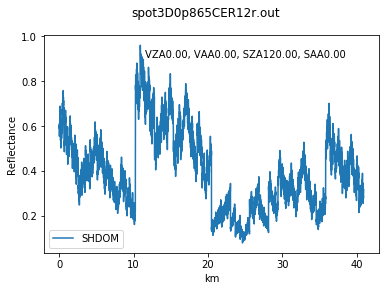

In [21]:
fig1,ax1 = plt.subplots()
fig1_ttl = sfname+'r.out'
ax1.plot(fc.x,np.pi*Rad[0,:]/mu_SZA,label='SHDOM')
ax1.text(0.3,0.9,'VZA%0.2f, VAA%0.2f, SZA%0.2f, SAA%0.2f'%(VZA[0],VAA[0],SZA,SAA),  transform = ax1.transAxes)
ax1.set_xlabel('km')
ax1.set_ylabel('Reflectance')
fig1.suptitle(fig1_ttl)
import h5py
f=h5py.File('fractal_cld_b865re12ve05_x40km_MSCART_SZA120_SAA000_VAA000plus_NPH1e5.hdf5','r')
rdd = f['MeanPRad'][:]
f.close()
#ax1.plot(fc.x,rdd[61,:,0],label='MSCART')
ax1.legend(loc='lower left')

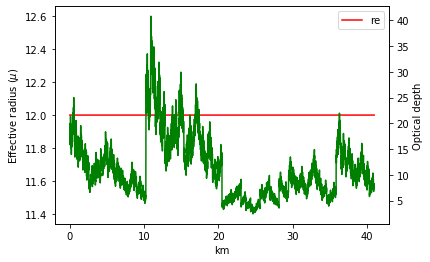

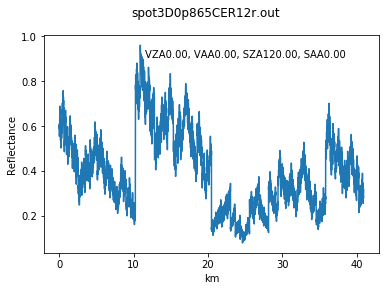

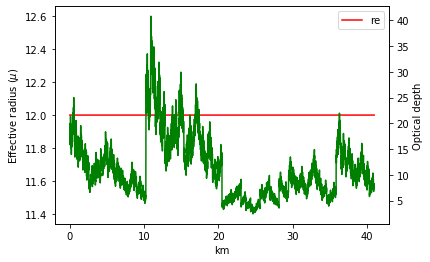

In [23]:
fig1,ax1 = plt.subplots()
fig1_ttl = sfname+'r.out'
ax1.plot(fc.x,np.pi*Rad[0,:]/mu_SZA,label='SHDOM')
ax1.text(0.3,0.9,'VZA%0.2f, VAA%0.2f, SZA%0.2f, SAA%0.2f'%(VZA[0],VAA[0],SZA,SAA),  transform = ax1.transAxes)
ax1.set_xlabel('km')
ax1.set_ylabel('Reflectance')
fig1.suptitle(fig1_ttl)
fc.plot_cld()